<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment2-Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Asignment
Implement feature reduction and classification tasks, as described below, in Python. You may utilize built-in libraries. You will be utilizing the Spambase data set described further in section

### PCA
The Spambase data set from the machine learning repository consists of 57 features. Implement feature reduction with principal component analysis (PCA). Let the number of features after reduction be s, where s < 57. Explain how you chose an appropriate value for s.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# read in dataset
data = np.genfromtxt('spambase.data', delimiter=',')
data[:,-1]

array([1., 1., 1., ..., 0., 0., 0.])

In [10]:
# get column names from names file to understand the features
f = open('spambase.names', 'r')
lines = [line.strip() for line in f]
f.close()
# comment lines start with | or 1 in this case + empty lines; colnames and type are separated by :
colnames = [line.partition(':')[0] for line in lines if not (len(line) == 0 or line[0] == '|' or line[0] == '1')]
# need to add the name for the final column
colnames.append('spam')
len(colnames)

58

In [24]:
# store as DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=colnames)

# Nicer view of the data, easier to explore
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


We do feature reduction with PCA (Principal Component Analysis).

Look at the value of "Explained Variance" of
the principal components and select number of components such that the sum of
explained variance is over 0.85


The code below plots the explained variance against the number of components needed.

We see that to achieve a *cumulative* variance higher than 80%, we need more than 40 principal components

In [34]:
# Standardizing the features
ArraySS = StandardScaler().fit_transform(df) 

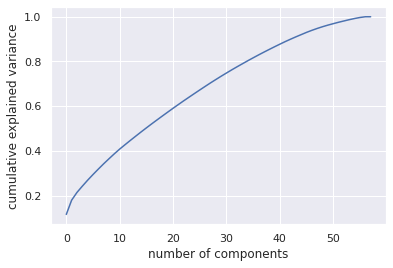

In [33]:
sns.set()
pca = PCA().fit(ArraySS)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Now we will try a PCA with 40 number of components

and print their exmplaned variance

In [35]:
#****************************************
# Perform PCA
pca = PCA(n_components=40)
PCAData = pca.fit_transform(ArraySS)

#****************************************
# Explained Variance
print("\n")
print("PCA Explained Variance")
print(pca.explained_variance_ratio_)
print("\n")




PCA Explained Variance
[0.11549281 0.06372187 0.03469758 0.02785484 0.02685344 0.02531354
 0.02441344 0.02371433 0.02262437 0.02211387 0.02108122 0.01952586
 0.01932794 0.01888879 0.018772   0.01833443 0.01807848 0.01766476
 0.01752321 0.0173008  0.01719022 0.01686902 0.016673   0.01624736
 0.0161568  0.01596367 0.01579506 0.01561299 0.01507533 0.0149258
 0.01441411 0.0142934  0.01376257 0.0134713  0.0134062  0.01301422
 0.01275456 0.01243389 0.01213773 0.01197307]




Now we plot the numbers obtained above. 

This is the proportion of variance explained by each component

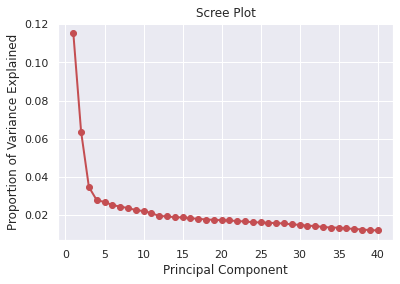

In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Now we plot how many components we would need to achieve a 95% cumulative variance

We see that we would need 49 principal components

In [37]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(ArraySS)
print(X_trans.shape)

(4601, 49)


### PART 2

Implement classification using Naive Bayes’ classifier, as described below:
* Split the data into train-test set in 70-30 ratio.
* If the classes are unbalanced, that is, many more samples in one class versus the other, then perform class balancing in the train set, using upsampling.
* Train the classifier with the train data set.
* Assess the accuracy of the classifier, on the test data set, with measures such as confusion matrix, precision, recall and F-score.
* Discuss the results.

In [44]:
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [38]:
data = pd.read_csv('spambase.data', header=None)
data.rename(columns={57:'is_spam'}, inplace=True)

In [39]:
spam = data[data['is_spam'] == 1]
ham = data[data['is_spam'] == 0]

In [45]:
spam_train, spam_test = train_test_split(spam, train_size=0.7)
ham_train, ham_test = train_test_split(ham, train_size=0.7)

In [46]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [47]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

In [48]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
spam_bayes.score(X_test, y_test)

0.7994207096307024

In [51]:
spam_bayes.score(X_train, y_train)

0.796583850931677